In [ ]:
#Importo librerias
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
raw_mail_data = pd.read_csv("/content/drive/MyDrive/2024-2/Machin/mail_data.csv")

In [ ]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


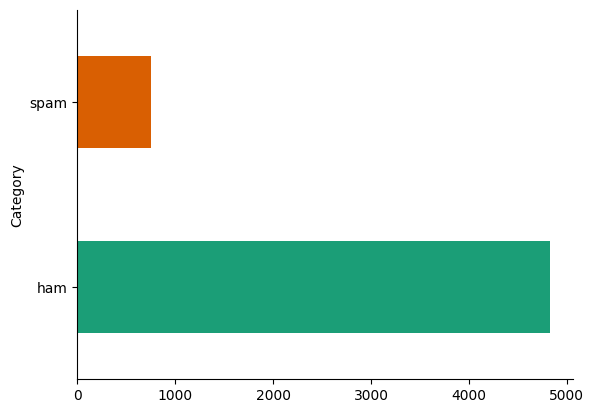

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
raw_mail_data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#importar librerias para aprendizaje automatico
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#verificar si hay valores nulos en el archivo o datos sin procesar
raw_mail_data.isnull().sum()

,0
Category,0
Message,0


In [ ]:
#si hay valores nulos, los reemplaza con un espacio en blanco
df = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [ ]:
df.isnull().sum()

,0
Category,0
Message,0


In [ ]:
#Datos en el archivo (filas y columnas)
df.shape

(5572, 2)

In [ ]:
#convertimos spam y ham en numeros binarios
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})

In [ ]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#separamos los datros en X y Y
X = df['Message']
Y = df['Category']

In [ ]:
X

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
Y

,Category
0,1
1,1
2,0
3,1
4,1
...,...
5567,0
5568,1
5569,1
5570,1


In [ ]:
#Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(4457,)

In [ ]:
y_train.shape

(4457,)

In [ ]:
X_test.shape

(1115,)

In [ ]:
#Transformamos los textos en numeros
feature_extraction = TfidfVectorizer(min_df = 1, stop_words="english", binary=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
#verificamos si esta en numeros enteros
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
#Entrenamos los datos
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [ ]:
X_train

,Message
1978,Reply to win £100 weekly! Where will the 2006 ...
3989,Hello. Sort of out in town already. That . So ...
3935,How come guoyang go n tell her? Then u told her?
4078,Hey sathya till now we dint meet not even a si...
4086,Orange brings you ringtones from all time Char...
...,...
3772,"Hi, wlcome back, did wonder if you got eaten b..."
5191,"Sorry, I'll call later"
5226,Prabha..i'm soryda..realy..frm heart i'm sory
5390,Nt joking seriously i told


In [ ]:
print(X_train_features)

  (0, 5512)	0.1898892037332199
  (0, 7222)	0.2173884735352799
  (0, 258)	0.2379428657041507
  (0, 7162)	0.2550284465664535
  (0, 354)	0.3544175987866074
  (0, 2724)	0.3544175987866074
  (0, 7300)	0.24288153842988894
  (0, 2049)	0.3034375179183143
  (0, 3262)	0.33791755486732394
  (0, 5800)	0.17558937755823417
  (0, 6264)	0.1898892037332199
  (0, 694)	0.3171299579602537
  (0, 2497)	0.2442158912653505
  (0, 5818)	0.22682143517864364
  (1, 3267)	0.26787130770292167
  (1, 6109)	0.32397626344658004
  (1, 6738)	0.28986069568917994
  (1, 2335)	0.21623212751660786
  (1, 5650)	0.3604441444703179
  (1, 3333)	0.20665394084233094
  (1, 2440)	0.3387054464839871
  (1, 4509)	0.40282459910606705
  (1, 3932)	0.24325511357721422
  (1, 3804)	0.19029023465152678
  (1, 2555)	0.3840709491751003
  :	:
  (4452, 3084)	0.22948428918295163
  (4452, 3290)	0.26370969643076225
  (4452, 3978)	0.4574160733416501
  (4452, 7280)	0.3968991650168732
  (4452, 2438)	0.4574160733416501
  (4452, 7264)	0.479751063610169
  (44

In [ ]:
print(X_test_features)

  (0, 1751)	0.34896165336060586
  (0, 2065)	0.36113324080559445
  (0, 2173)	0.30145841567028486
  (0, 3225)	0.402169324846608
  (0, 3395)	0.402169324846608
  (0, 3955)	0.3774291665065587
  (0, 4100)	0.3392428284838497
  (0, 4942)	0.27552235188443686
  (1, 1361)	0.37034060973735533
  (1, 1975)	0.3578586983359201
  (1, 3443)	0.3234324946551934
  (1, 4044)	0.3234324946551934
  (1, 5430)	0.387052012561607
  (1, 6544)	0.2204999931204713
  (1, 6642)	0.326271353777915
  (1, 6986)	0.2493471978387002
  (1, 7158)	0.3981347747267476
  (2, 1292)	0.31502044528879175
  (2, 2377)	0.42309928191578644
  (2, 3067)	0.21988546741069182
  (2, 3084)	0.21988546741069182
  (2, 3510)	0.4016985150384896
  (2, 4369)	0.42309928191578644
  (2, 5597)	0.4382833676588088
  (2, 6570)	0.30427433251497293
  :	:
  (1110, 2380)	0.3362376691126707
  (1110, 2437)	0.24437455884042017
  (1110, 2749)	0.2379337409312386
  (1110, 3084)	0.16868944269743877
  (1110, 3180)	0.3526556865484764
  (1110, 3938)	0.24167410415901527
  (11

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [ ]:
#predecir el modelo basado en los datos de entrenamiento
prediction_train_data = model.predict(X_train_features)
accuracy_train_data = accuracy_score(y_train, prediction_train_data)

In [ ]:
print("Accuarcy on train data: ", accuracy_train_data)

Accuarcy on train data:  0.9649988781691721


In [ ]:
#predecir el modelo basado en los datos de prueba
prediction_test_data = model.predict(X_test_features)
accuracy_test_data = accuracy_score(y_test, prediction_test_data)

In [ ]:
print("Accuarcy on test data: ", accuracy_test_data)

Accuarcy on test data:  0.9659192825112107


In [ ]:
#se construye un sistema de prediccion para clasificar spam y correo deseado
input_user_mail = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]

input_data_features = feature_extraction.transform(input_user_mail)

prediction = model.predict(input_data_features)

if prediction[0] == 1:
    print("This is a Desired mail")
else:
    print("This is a spam mail")

This is a spam mail


In [ ]:
#guardamos el modelo entrenado y el objeto de vectorización en archivos
import pickle
pickle.dump(model, open("logistic_regression.pkl", "wb"))
pickle.dump(feature_extraction, open("feature_extraction.pkl", "wb"))